### 機器學習 HW04
### 0852617 統計碩 曾鈺評

### 1. Logistic regression

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def NormalGenerator(m, s):
    u = np.random.uniform(0,1)
    v = np.random.uniform(0,1)
    z = math.sqrt(-2*math.log(u)) * math.cos(2*math.pi*v)
    output = m + z*np.sqrt(s)
    return output

In [3]:
def sigmoid(design_matrix, w):
    return 1 / (1 + np.exp(-design_matrix@w))

In [27]:
def evaluation_criteria(prediction, label):
    confusion_matrix = [[0,0], [0,0]]
    predict_cluster = prediction >= 0.5
    for i in range(2):
        for j in range(2):
            confusion_matrix[i][j] = sum(predict_cluster[label==i] == j)
    sensitivity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    specificity = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])
    return confusion_matrix, sensitivity, specificity

In [81]:
def print_evaluation_criteria(confusion_matrix, sensitivity, specificity):
    print("\nConfusion Matrix: ")
    print("\t\tPredict cluster 1 Predict cluster 2")
    print("Is cluster 1 \t\t %2s \t\t %2s" %(confusion_matrix[0][0], confusion_matrix[0][1]))
    print("Is cluster 2 \t\t %2s \t\t %2s" %(confusion_matrix[1][0], confusion_matrix[1][1]))
    print("\nSensitivity (Successfully predict cluster 1): %.5f" %sensitivity)
    print("Specificity (Successfully predict cluster 2): %.5f" %specificity)

In [82]:
n = int(input("N = "))
mx_1 = float(input("mx1 = "))
vx_1 = float(input("vx1 = "))
my_1 = float(input("my1 = "))
vy_1 = float(input("vy1 = "))
mx_2 = float(input("mx2 = "))
vx_2 = float(input("vx2 = "))
my_2 = float(input("my2 = "))
vy_2 = float(input("vy2 = "))

N = 50
mx1 = 1
vx1 = 2
my1 = 1
vy1 = 2
mx2 = 10
vx2 = 2
my2 = 10
vy2 = 2


In [83]:
D1 = []
D2 = []
design_matrix = []
for i in range(n):
    data_point_1 = [NormalGenerator(mx_1, vx_1), NormalGenerator(my_1, vy_1)]
    data_point_2 = [NormalGenerator(mx_2, vx_2), NormalGenerator(my_2, vy_2)]
    D1.append([1] + data_point_1)
    D2.append([1] + data_point_2)

D1 = np.array(D1)
D2 = np.array(D2)
design_matrix = np.vstack([D1, D2]) #
label = np.array(list([0])*n + list([1])*n).reshape(-1,1)

In [84]:
# Gradient Decent
print("Gradient descent: ")
w = np.array([[0.0], [0.0], [0.0]])
learning_rate = 0.001
maxit = 100

for i in range(maxit):
    y_pred = sigmoid(design_matrix, w) # 1 / (1 + np.exp(-z))
    gradient = design_matrix.T@(y_pred - label)
    w_new = w - learning_rate*gradient
    if sum((w_new - w)**2) < 1e-4:
        break
    w = w_new
gradient_prediction = sigmoid(design_matrix, w_new)
confusion_matrix, sensitivity, specificity = evaluation_criteria(gradient_prediction, label)
print("w: ")
for i in range(w_new.shape[0]):
    print(w_new[i][0])
print_evaluation_criteria(confusion_matrix, sensitivity, specificity)
print("----------------------------------------")



# Newton's Method
print("Newton's method:")
w = np.array([[0.0], [0.0], [0.0]])
maxit = 100

for i in range(maxit):
    y_pred = sigmoid(design_matrix, w) # 1 / (1 + np.exp(-z))
    gradient = design_matrix.T@(y_pred - label)
    D = np.eye(design_matrix.shape[0])
    for k in range(D.shape[0]):
        D[k][k] = y_pred[k][0] * (1 - y_pred[k][0])
        if D[k][k] == 0:
            D[k][k] = 1e-10 
    hessian = design_matrix.T@D@design_matrix
    w_new = w - np.linalg.inv(hessian)@gradient
    if sum((w_new - w)**2) < 1e-4:
        break
    w = w_new
newton_prediction = sigmoid(design_matrix, w_new)
confusion_matrix, sensitivity, specificity = evaluation_criteria(newton_prediction, label)
print("w: ")
for i in range(w_new.shape[0]):
    print(w_new[i][0])
print_evaluation_criteria(confusion_matrix, sensitivity, specificity)
print("----------------------------------------")

Gradient descent: 
w: 
-1.6495405992029513
0.3251753296924352
0.16019034465515028

Confusion Matrix: 
		Predict cluster 1 Predict cluster 2
Is cluster 1 		 50 		  0
Is cluster 2 		  0 		 50

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000
----------------------------------------
Newton's method:
w: 
-59.55736254450363
7.638709167640238
2.998388029106183

Confusion Matrix: 
		Predict cluster 1 Predict cluster 2
Is cluster 1 		 50 		  0
Is cluster 2 		  0 		 50

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000
----------------------------------------


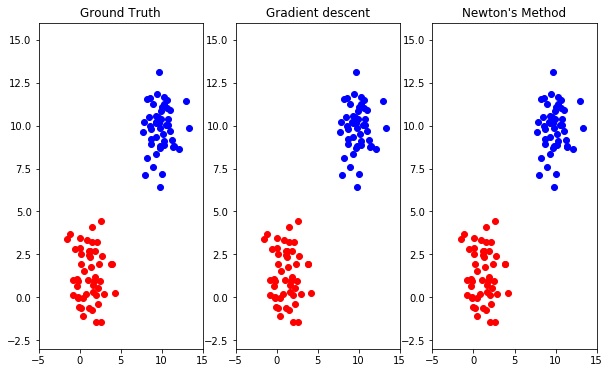

In [85]:
gradient_c1 = gradient_prediction[:,0] < 0.5
gradient_c2 = gradient_prediction[:,0] >= 0.5
newton_c1 = newton_prediction[:,0] < 0.5
newton_c2 = newton_prediction[:,0] >= 0.5

fig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title("Ground Truth")
plt.xlim(-5, 15)
plt.ylim(-3, 16)
plt.scatter(D1[:,1], D1[:,2], color = 'red')
plt.scatter(D2[:,1], D2[:,2], color = 'blue')

plt.subplot(1,3,2)
plt.title("Gradient descent")
plt.xlim(-5, 15)
plt.ylim(-3, 16)
plt.scatter(design_matrix[gradient_c1,1], design_matrix[gradient_c1,2], color = 'red')
plt.scatter(design_matrix[gradient_c2,1], design_matrix[gradient_c2,2], color = 'blue')

plt.subplot(1,3,3)
plt.title("Newton's Method")
plt.xlim(-5, 15)
plt.ylim(-3, 16)
plt.scatter(design_matrix[newton_c1,1], design_matrix[newton_c1,2], color = 'red')
plt.scatter(design_matrix[newton_c2,1], design_matrix[newton_c2,2], color = 'blue')
plt.show()

In [86]:
n = int(input("N = "))
mx_1 = float(input("mx1 = "))
vx_1 = float(input("vx1 = "))
my_1 = float(input("my1 = "))
vy_1 = float(input("vy1 = "))
mx_2 = float(input("mx2 = "))
vx_2 = float(input("vx2 = "))
my_2 = float(input("my2 = "))
vy_2 = float(input("vy2 = "))

N = 50
mx1 = 1
vx1 = 2
my1 = 1
vy1 = 2
mx2 = 3
vx2 = 4
my2 = 3
vy2 = 4


In [87]:
D1 = []
D2 = []
design_matrix = []
for i in range(n):
    data_point_1 = [NormalGenerator(mx_1, vx_1), NormalGenerator(my_1, vy_1)]
    data_point_2 = [NormalGenerator(mx_2, vx_2), NormalGenerator(my_2, vy_2)]
    D1.append([1] + data_point_1)
    D2.append([1] + data_point_2)

D1 = np.array(D1)
D2 = np.array(D2)
design_matrix = np.vstack([D1, D2]) 
label = np.array(list([0])*n + list([1])*n).reshape(-1,1)

In [88]:
# Gradient Decent
print("Gradient descent: ")
w = np.array([[0.0], [0.0], [0.0]])
learning_rate = 0.001
maxit = 100

for i in range(maxit):
    y_pred = sigmoid(design_matrix, w) # 1 / (1 + np.exp(-z))
    gradient = design_matrix.T@(y_pred - label)
    w_new = w - learning_rate*gradient
    if sum((w_new - w)**2) < 1e-4:
        break
    w = w_new
gradient_prediction = sigmoid(design_matrix, w_new)
confusion_matrix, sensitivity, specificity = evaluation_criteria(gradient_prediction, label)
print("w: ")
for i in range(w_new.shape[0]):
    print(w_new[i][0])
print_evaluation_criteria(confusion_matrix, sensitivity, specificity)
print("\n----------------------------------------")



# Newton's Method
print("\nNewton's method:")
w = np.array([[0.0], [0.0], [0.0]])
maxit = 100

for i in range(maxit):
    y_pred = sigmoid(design_matrix, w) # 1 / (1 + np.exp(-z))
    gradient = design_matrix.T@(y_pred - label)
    D = np.eye(design_matrix.shape[0])
    for k in range(D.shape[0]):
        D[k][k] = y_pred[k][0] * (1 - y_pred[k][0])
        if D[k][k] == 0:
            D[k][k] = 1e-10 #np.exp(300) / ((1 + np.exp(300)) ** 2)  #1e-323
    hessian = design_matrix.T@D@design_matrix
    w_new = w - np.linalg.inv(hessian)@gradient
    if sum((w_new - w)**2) < 1e-4:
        break
    w = w_new
newton_prediction = sigmoid(design_matrix, w_new)
confusion_matrix, sensitivity, specificity = evaluation_criteria(newton_prediction, label)
print("w: ")
for i in range(w_new.shape[0]):
    print(w_new[i][0])
print_evaluation_criteria(confusion_matrix, sensitivity, specificity)

Gradient descent: 
w: 
-0.5996672007983966
0.12933614656769116
0.4157769352651017

Confusion Matrix: 
		Predict cluster 1 Predict cluster 2
Is cluster 1 		 28 		 22
Is cluster 2 		  8 		 42

Sensitivity (Successfully predict cluster 1): 0.56000
Specificity (Successfully predict cluster 2): 0.84000

----------------------------------------

Newton's method:
w: 
-2.442254304305781
0.4358693284294053
0.8906199358921094

Confusion Matrix: 
		Predict cluster 1 Predict cluster 2
Is cluster 1 		 42 		  8
Is cluster 2 		 12 		 38

Sensitivity (Successfully predict cluster 1): 0.84000
Specificity (Successfully predict cluster 2): 0.76000


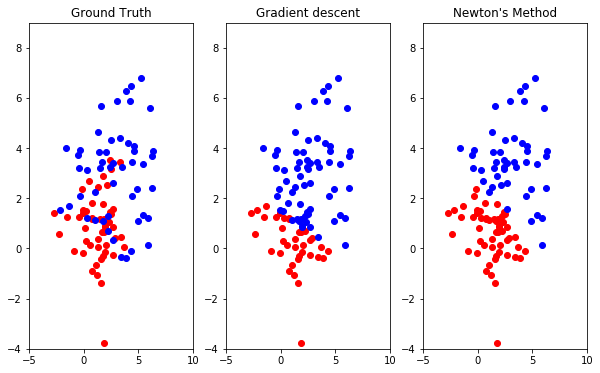

In [89]:
gradient_c1 = gradient_prediction[:,0] < 0.5
gradient_c2 = gradient_prediction[:,0] >= 0.5
newton_c1 = newton_prediction[:,0] < 0.5
newton_c2 = newton_prediction[:,0] >= 0.5

fig = plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title("Ground Truth")
plt.xlim(-5, 10)
plt.ylim(-4, 9)
plt.scatter(D1[:,1], D1[:,2], color = 'red')
plt.scatter(D2[:,1], D2[:,2], color = 'blue')

plt.subplot(1,3,2)
plt.title("Gradient descent")
plt.xlim(-5, 10)
plt.ylim(-4, 9)
plt.scatter(design_matrix[gradient_c1,1], design_matrix[gradient_c1,2], color = 'red')
plt.scatter(design_matrix[gradient_c2,1], design_matrix[gradient_c2,2], color = 'blue')

plt.subplot(1,3,3)
plt.title("Newton's Method")
plt.xlim(-5, 10)
plt.ylim(-4, 9)
plt.scatter(design_matrix[newton_c1,1], design_matrix[newton_c1,2], color = 'red')
plt.scatter(design_matrix[newton_c2,1], design_matrix[newton_c2,2], color = 'blue')
plt.show()

### 2. EM algorithm

In [60]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
import math
import sklearn.utils#.linear_assignment_ 
from scipy.optimize import linear_sum_assignment as linear_assignment

In [61]:
def ReadData(path, filename, num_char, num_images, image_size=28, num_channels=1):
    with gzip.open(path+filename) as file:
        file.read(num_char)
        buf = file.read(num_images * image_size * image_size * num_channels)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int)
    return data

In [62]:
# E step
def E_Step(training_X, pi, mu):
    prob = (mu.reshape(1, 784, 10)**training_X) * ((1-mu.reshape(1, 784, 10))**(1-training_X)) # *60000*784*10
    responsibility = pi.reshape(1,10) * np.prod(prob, axis=1)
    marginal = responsibility.sum(axis=1)
    responsibility[marginal != 0,:] = responsibility[marginal != 0,:] / marginal[marginal != 0].reshape(-1, 1)
    return responsibility

In [63]:
# M step
def MStep(responsibility, training_X):
    N_k = responsibility.sum(axis=0).reshape(1,10)
    mu = training_X.squeeze().T@responsibility / N_k
    #mu /= mu.sum(axis=0).reshape(1,10)
    pi = N_k / 60000
    return mu, pi

In [64]:
def cluster_accuracy(prediction, training_Y):
    D = 10
    W = np.zeros((D,D))
    for i,j in zip(prediction, training_Y):
        W[i][j] += 1
    W_new = W.max() - W
    pred_indices = []
    true_indices = []
    for iteration in range(D):
        pred_index, true_index = np.where(W_new == W_new.min())
        pred_indices.append(pred_index[0])
        true_indices.append(true_index[0])
        W_new[pred_index[0],:] = training_Y.shape[0] + 1
        W_new[:,true_index[0]] = training_Y.shape[0] + 1
    clustering_accuracy = 0
    for k in range(D):
        clustering_accuracy += W[pred_indices[k], true_indices[k]] / prediction.shape
    return clustering_accuracy, np.array(pred_indices), np.array(true_indices)

In [65]:
def print_class(mu):
    mu = (mu > 0.5)*1
    for class_number in range(10):
        print("class: %s" % class_number)
        for pixel in range(28*28):
            if pixel % 28 == 27:
                print(mu[pixel,class_number])
            else:
                print(mu[pixel,class_number], end=' ')
        print("\n")

In [66]:
def print_label_class(mu, pred_indices, true_indices):
    mu = (mu > 0.5)*1
    for true_number in range(10):
        print("labeled class: %s" % true_number)
        true_index = np.where(true_indices == true_number)
        pred_index = pred_indices[true_index][0]
        for pixel in range(28*28):
            if pixel % 28 == 27:
                print(mu[pixel, pred_index])#.squeeze())
            else:
                print(mu[pixel, pred_index], end=' ')#.squeeze(), end=' ')
        print("\n")

In [74]:
def print_evaluation_criteria(prediction, training_Y, pred_indices, true_indices):
    for true_number in range(10):
        confusion_matrix = [[0,0], [0,0]]
        true_index = np.where(true_indices == true_number)[0]
        pred_index = pred_indices[true_index][0]
        confusion_matrix[0][0] = sum((training_Y == true_number) & (prediction == pred_index))
        confusion_matrix[0][1] = sum((training_Y == true_number) & (prediction != pred_index))
        confusion_matrix[1][0] = sum((training_Y != true_number) & (prediction == pred_index))
        confusion_matrix[1][1] = sum((training_Y != true_number) & (prediction != pred_index))
        sensitivity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
        specificity = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])
        print("\n------------------------------------------------------------\n")
        print("\nConfusion Matrix: %s" %true_number)
        print("\t\tPredict number %s Predict not number %s" %(true_number,true_number))
        print("Is number %s \t\t %5s \t\t %5s" %(true_number, confusion_matrix[0][0], confusion_matrix[0][1]))
        print("Is not number %s \t %5s \t\t %5s" %(true_number, confusion_matrix[1][0], confusion_matrix[1][1]))
        print("\nSensitivity (Successfully predict number %s): \t %.5f" % (true_number, sensitivity))
        print("specificity (Successfully predict not number %s): %.5f" % (true_number, specificity))

In [75]:
directory = "D:\\1091NCTU\Machine learning\\Homework\\"

In [76]:
training_X = ReadData(filename="train-images-idx3-ubyte.gz", path=directory, num_char=16, num_images=60000)
training_Y = ReadData(filename="train-labels-idx1-ubyte.gz", path=directory, num_char=8, num_images=60000)

training_X = ((training_X >= 128)*1).reshape(60000, 28*28, 1)


#### initialize the parameters

In [77]:
mu = np.random.uniform(0.25,0.75,784*10).reshape(784,10)
mu_temp = mu
pi = np.repeat(0.1, 10).reshape(1,10)

In [78]:
clustering_accuracy_previous = 0
maxit = 20 #20
for i in range(maxit):
    responsibility = E_Step(training_X=training_X, pi=pi, mu=mu)
    prediction_temp = np.argmax(responsibility, axis=1)
    clustering_accuracy, pred_indices_temp, true_indices_temp = cluster_accuracy(prediction_temp, training_Y)
    mu, pi = MStep(responsibility=responsibility, training_X=training_X)
    difference = (abs(mu - mu_temp)).sum()
    mu_temp = mu
    
    if abs(clustering_accuracy_previous - clustering_accuracy) < 1e-3:
        break
    else:
        prediction = prediction_temp
        clustering_accuracy_previous = clustering_accuracy
        pred_indices = pred_indices_temp
        true_indices = true_indices_temp
    
    print_class(mu)
    print("No. of Iteration: %s, Difference: %s\n" %(i+1, difference))
    print("error rate = %.20f" %(1 - clustering_accuracy))
    
    print("------------------------------------------------------------\n")
    #print("\n")
print("------------------------------------------------------------\n")
print_label_class(mu, pred_indices, true_indices)
print_evaluation_criteria(prediction, training_Y, pred_indices, true_indices)
clustering_accuracy, pred_indices, true_indices = cluster_accuracy(prediction, training_Y)
print("\nTotal iteration to converge: %s" %(i+1))
print("Total error rate: %.20f" %(1 - clustering_accuracy))

class: 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0